**Chapter 4 – Training Linear Models**

_This notebook contains all the sample code and solutions to the exercises in chapter 4._

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/add-kaggle-badge/04_training_linear_models.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [18]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Linear regression using the Normal Equation

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Saving figure generated_data_plot


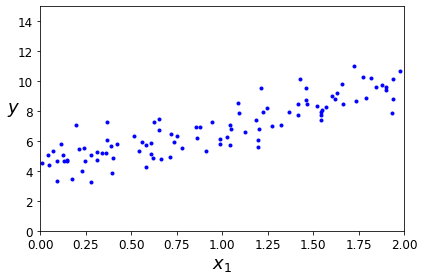

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

Some `numpy` tricks:

In [54]:
# Add a column of ones to X. The numpy function stack joins arrays along a given axis. 
# The first axis (axis=0) refers to rows (training examples) 
# and second axis (axis=1) refers to columns (features).
# stack doesn't work and I don't know why, here's hstack which is
# rightful for this porpose
X_b = np.hstack([np.ones((100, 1)), X])

In [26]:
A, B = np.array([1,2,3]), np.array([4,5,6])

In [27]:
np.hstack([A, B])

array([1, 2, 3, 4, 5, 6])

In [28]:
np.vstack([A, B])

array([[1, 2, 3],
       [4, 5, 6]])

- `numpy.c_`
Translates slice objects to concatenation along the second axis.
- `numpy.r_`
Translates slice objects to concatenation along the first axis.

In [34]:
np.c_[A, B] # same as np.vstack([A, B]).T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [31]:
np.r_[A, B]

array([1, 2, 3, 4, 5, 6])

Recall:
<div><div>
$$\hat{\theta} = (X^TX)^{-1}X^Ty$$

Using **Normal Equation**:

In [57]:
X_b = np.c_[np.ones((100, 1)), X] # An alternative to to add x0 = 1 to each instance
X_b = np.hstack([np.ones((100, 1)), X])
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [58]:
theta_best

array([[4.21509616],
       [2.77011339]])

Now let's make predictions using $\hat{\theta}$:

In [59]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

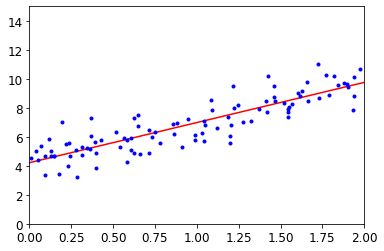

In [60]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

The figure in the book actually corresponds to the following code, with a legend and axis labels:

Saving figure linear_model_predictions_plot


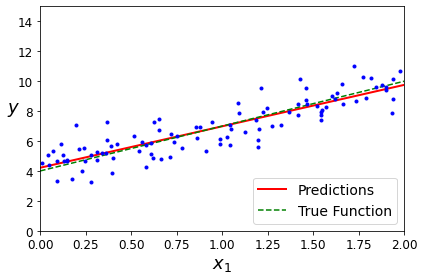

In [61]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
X_actual = np.linspace(0, 2, 50)
plt.plot(X_actual, 4 + 3 * X_actual, "g--", label="True Function")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="lower right", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

In [62]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [63]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

<div class="alert alert-info">

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for "least squares"), which you could call directly:

In [64]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [65]:
theta_best

array([[4.21509616],
       [2.77011339]])

<div class="alert alert-info">

This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the _pseudoinverse_ of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [67]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

If A is invertible, then the Moore-Penrose pseudo inverse is equal to the matrix inverse. However, the Moore-Penrose pseudo inverse is defined even when A is not invertible. In case of invertibility:

$$y = X\theta \Rightarrow \theta = X^+y \space\space\space\space \text{since} \space X^+X = I$$

In [75]:
np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

array([[4.21509616],
       [2.77011339]])

# Linear regression using batch gradient descent

<div class="alert alert-success">
    
$$J = \frac{1}{m}(X\theta - y)^T(X\theta - y)$$
    
$$\nabla_\theta\text{MSE}(\theta) = \frac{2}{m}X^T(X\theta - y)$$

In [76]:
X_b.shape, X_new_b.shape

((100, 2), (2, 2))

In [166]:
eta = 0.1  # learning rate
n_iterations = 400
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [167]:
theta_bgd = theta
theta_bgd

array([[4.21509467],
       [2.7701147 ]])

In [168]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [169]:
X_new_b.dot(theta)

array([[4.21509467],
       [9.75532407]])

In [85]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None, \
                          n_iterations = 400):
    m = len(X_b)
    plt.plot(X, y, "b.")

    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descent_plot


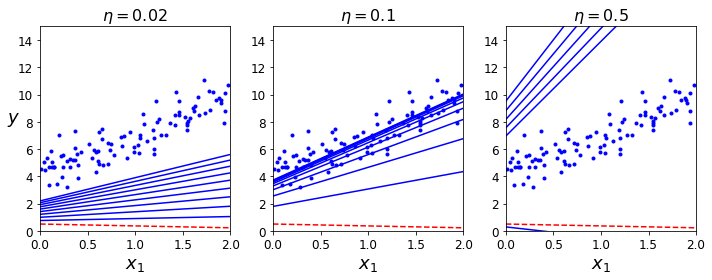

In [86]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization
# theta = np.array([[8], [3]])

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

<div class="alert alert-success">
    
You may wonder how to set the number of iterations. If it is too low, you will still be
far away from the optimal solution when the algorithm stops; but if it is too high, you
will waste time while the model parameters do not change anymore. A simple solution
is to set a very large number of iterations but to interrupt the algorithm when the
gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny
number ϵ (called the *tolerance*)—because this happens when Gradient Descent has
(almost) reached the minimum.
    
<div class="alert alert-info">

#### Convergence Rate
    
When the cost function is convex and its slope does not change abruptly (as is the
case for the MSE cost function), Batch Gradient Descent with a fixed learning rate
will eventually converge to the optimal solution, but you may have to wait a while: it
can take $O(\frac{1}{ϵ})$ iterations to reach the optimum within a range of ϵ, depending on the
shape of the cost function. If you divide the tolerance by 10 to have a more precise
solution, then the algorithm may have to run about 10 times longer.

# Multioutput regression

In [87]:
import numpy as np
# DO NOT add any library

In [88]:
# %config Completer.use_jedi = False

In [89]:
# X, Y = np.load("../Balad Interview Question/X_train.npy"), np.load("../Balad Interview Question/Y_train.npy")

In [90]:
# np.save("datasets/X_train.npy", X, allow_pickle=True)
# np.save("datasets/Y_train.npy", Y, allow_pickle=True)

In [179]:
X, Y = np.load("datasets/X_train.npy"), np.load("datasets/Y_train.npy")
X.shape, Y.shape

((4932, 300), (4932, 300))

$$J = \frac{1}{m}\lVert XT - Y \rVert_F^2$$

$$ \nabla_T J = \frac{\partial}{\partial T}J = \frac{2}{m}X^T(XT - Y)$$

$$T := T - \alpha \times (\frac{2}{m}X^T(XT - Y))$$

In [131]:
def train_transformation(X = np.load("datasets/X_train.npy"), \
                         Y = np.load("datasets/Y_train.npy"), \
                         T = 0.01*np.random.randn(X.shape[1],   \
                                             Y.shape[1]), \
                         train_steps=2000, learning_rate=0.003):
    import time
    t0 = time.time()
    #please write your code here
    # find best R using Gradient Descent
    #WRITE your code here
    for i in range(train_steps):    
        T = T - learning_rate * 2 * np.dot(X.T, np.dot(X, T) - Y) / X.shape[0]
    #END of your code
    print(time.strftime("%H:%M:%S",time.gmtime(time.time() - t0)))
    return T

In [132]:
T1 = train_transformation()

00:02:32


In [133]:
Y - np.dot(X, T1)

array([[ 0.0082619 ,  0.00035593,  0.01504904, ...,  0.08371017,
        -0.07910412, -0.06621274],
       [-0.01780493,  0.05200091, -0.01233766, ..., -0.09758698,
         0.00768638, -0.05405779],
       [ 0.05069059,  0.04586119,  0.01361227, ...,  0.00597389,
         0.03536035,  0.08007059],
       ...,
       [ 0.09143894, -0.04258379,  0.03476019, ..., -0.04719977,
        -0.06263046, -0.02938904],
       [-0.09337749,  0.06467872,  0.03572148, ...,  0.07675236,
         0.05239774, -0.02073223],
       [-0.02773169, -0.00183006,  0.01453055, ...,  0.0599957 ,
         0.07277116,  0.06486317]])

### Using Closed Form (Normal Equation)

$$T = (X^TX)^{-1}X^TY$$

In [134]:
T2 = np.dot(np.linalg.inv(np.dot(X.T, X)),np.dot(X.T, Y))

In [135]:
Y - np.dot(X, T2)

array([[ 1.6663857e-02, -3.9513921e-05,  1.6474392e-02, ...,
         8.2595743e-02, -6.8734989e-02, -5.7655793e-02],
       [-2.0205462e-02,  4.2989884e-02, -1.0546833e-02, ...,
        -7.1266659e-02, -8.9967735e-03, -5.0542835e-02],
       [ 5.7297938e-02,  2.5260489e-02,  7.8991130e-03, ...,
         4.5105424e-03,  2.2712469e-02,  7.8578316e-02],
       ...,
       [ 6.8421006e-02, -5.5461466e-02,  2.7625354e-02, ...,
        -1.9417215e-02, -4.6259448e-02, -2.3251528e-02],
       [-5.7751767e-02,  6.2895283e-02, -8.0579538e-03, ...,
         1.6216069e-02,  7.9797573e-02,  1.7267622e-02],
       [-8.4609929e-03, -1.5372798e-02, -5.1964540e-03, ...,
         7.2277561e-02,  5.3896904e-02,  1.1092387e-03]], dtype=float32)

In [144]:
(np.abs(T1 - T2) > 0.01).sum()

30911

#### Pseudo-Inverse?

In [145]:
T3 = np.linalg.pinv(X).dot(Y)

In [146]:
np.abs(T3 - T2) # almost identical

array([[5.58793545e-09, 1.11758709e-08, 6.28642738e-09, ...,
        2.84053385e-08, 3.25962901e-08, 2.14204192e-08],
       [9.31322575e-09, 2.56113708e-09, 1.69966370e-08, ...,
        1.62050128e-07, 1.64145604e-07, 9.39689926e-09],
       [4.65661287e-10, 1.71130523e-08, 2.23517418e-08, ...,
        9.77888703e-09, 7.45058060e-09, 1.23400241e-08],
       ...,
       [2.02562660e-08, 2.28174031e-08, 5.02914190e-08, ...,
        2.32830644e-08, 9.31322575e-10, 1.18743628e-08],
       [1.72294676e-08, 6.51925802e-09, 1.21071935e-08, ...,
        1.66706741e-07, 3.35276127e-08, 5.07570803e-08],
       [3.91155481e-08, 1.39698386e-08, 2.77068466e-08, ...,
        5.77419996e-08, 6.05359674e-08, 4.16766852e-08]], dtype=float32)

In [147]:
T3.shape

(300, 300)

In [150]:
(np.abs(T3 - T2) > 0.0000001).sum() / T2.size

0.005177777777777778

<div class="alert alert-danger">
    
The Normal Equation gets very slow when the number of features grows large (e.g. 100,000). The computational complexity of inverting a $n\times n$ matrix is typically about $O(n^{2.4})$ to $O(n^3)$. 

# Stochastic Gradient Descent

In [182]:
np.random.seed(42)

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [183]:
X_b = np.c_[np.ones((100,1)), X]

In [184]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

Saving figure sgd_plot


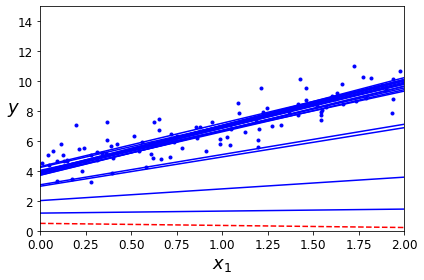

In [185]:

n_epochs = 10
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
save_fig("sgd_plot")                                 # not shown
plt.show()                                           # not shown

By convention we iterate by rounds of *m* iterations; each round is called an *epoch*. While the Batch Gradient Descent code iterated 400 times through the whole training set, this code goes through the training set only 10 times and reaches a fairly good solution:

In [186]:
theta_best, theta_bgd

(array([[4.21509616],
        [2.77011339]]),
 array([[4.21509467],
        [2.7701147 ]]))

In [187]:
theta_path_sgd[-1]

array([[4.19540063],
       [2.79306016]])

In [220]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, \
                       penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [221]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

In [ ]:
from sklearn.impute

# Mini-batch gradient descent

In [238]:
theta_path_mgd = []

n_iterations = 40
minibatch_size = 25

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [239]:
theta

array([[4.28279818],
       [2.84020566]])

In [240]:
theta_path_sgd[-1], theta_best, theta_bgd

(array([[4.19540063],
        [2.79306016]]),
 array([[4.21509616],
        [2.77011339]]),
 array([[4.21509467],
        [2.7701147 ]]))

In [243]:
theta_path_bgd.shape, theta_path_mgd.shape, theta_path_sgd.shape

((400, 2, 1), (160, 2, 1), (1000, 2, 1))

In [241]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Saving figure gradient_descent_paths_plot


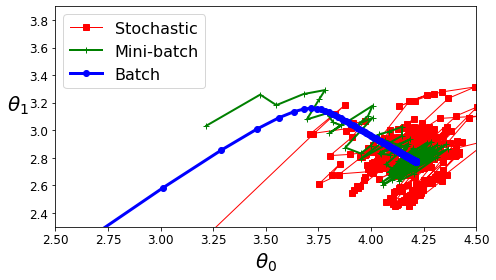

In [242]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

In [244]:
from IPython.core.display import display, HTML
display(HTML("""
<table style='margin: 0 auto'>
<tr><th>Algorithm</th><th>Large m</th><th>Out-of-Core</th><th>Large n</th><th>Hyperparameteres</th><th>Scaling required</th></tr>
<tr><td>Normal Equation</td><td>Fast</td><td>No</td><td>Slow</td><td>0</td><td>No</td></tr>
<tr><td>Batch GD</td><td>Slow</td><td>No</td><td>Fast</td><td>2</td><td>Yes</td></tr>
<tr><td>Stochastic GD</td><td>Fast</td><td>Yes</td><td>Fast</td><td>≥2</td><td>Yes</td></tr>
<tr><td>Mini-batch GD</td><td>Medium~Fast</td><td>Yes</td><td>Fast</td><td>≥2</td><td>Yes</td></tr>
</table>
"""))

Algorithm,Large m,Out-of-Core,Large n,Hyperparameteres,Scaling required
Normal Equation,Fast,No,Slow,0,No
Batch GD,Slow,No,Fast,2,Yes
Stochastic GD,Fast,Yes,Fast,≥2,Yes
Mini-batch GD,Medium~Fast,Yes,Fast,≥2,Yes


# Polynomial regression

In [470]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [471]:
m = 200
X = 1.2 * rnd.randn(m, 1)
y = 1.5 * X**2 - 0.3 * X ** 3 + 2 + np.random.randn(m, 1)

Saving figure quadratic_data_plot


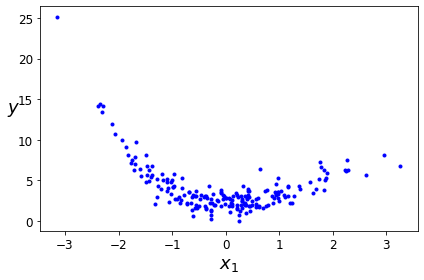

In [472]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
# plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

In [473]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.59605698])

In [474]:
X_poly[0]

array([0.59605698, 0.35528393, 0.21176947])

In [475]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

Saving figure quadratic_predictions_plot


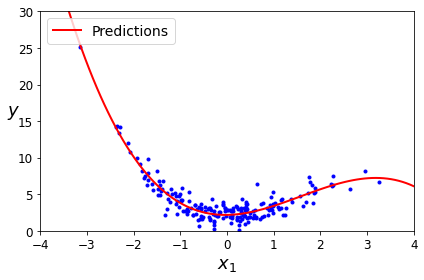

In [476]:
X_new=np.linspace(-4, 4, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-4, 4, 0, 30])
save_fig("quadratic_predictions_plot")
plt.show()

In [477]:
lin_reg.intercept_, lin_reg.coef_

(array([2.17412461]), array([[ 0.09943322,  1.43298351, -0.30324588]]))

<div class="alert alert-success">

Not bad: the model estimates $\hat{y} = -0.30x_1^3 + 1.43x_1^2 - 0.1x_1 + 2.17$ when in fact the original function was $y = -0.3x_1^3 + 1.5x_1^2 + 0x_1 + 2 + \text{Gaussian noise}$

Saving figure high_degree_polynomials_plot


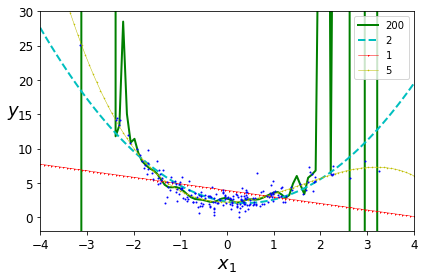

In [478]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 2, 200), ("c--", 2, 2),\
                             ("r-+", .5, 1), ("y-*", .5, 5)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width, markersize=1)

plt.plot(X, y, "b.", markersize=2)
plt.legend(loc="upper right")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-4, 4, -2, 30])
save_fig("high_degree_polynomials_plot")
plt.show()

Ok, this kind of plotting is only useful if you got only one feature($x_1$), but how can we tell if our model's performance is?

How can you decide how complex your model should be? How can you tell that your model is overfitting or underfitting?

In Chapter 2 you used cross-validation to get an estimate of a model's generalization performance. Here we're gonna look at another one, namely *learning curve*.

## Learning Curve

In [509]:
def plot_learning_curves(model, X, y):
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import train_test_split
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

Saving figure underfitting_learning_curves_plot


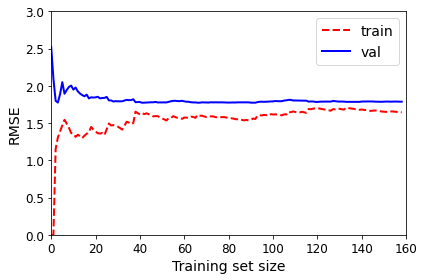

In [511]:
import numpy as np
from sklearn.linear_model import LinearRegression

m = 200
np.random.seed(42)
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m,1)

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, m - 0.2*m, 0, 3])                         # not shown in the book
save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()                                      # not shown

Saving figure learning_curves_plot


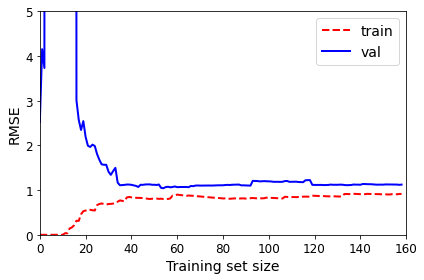

In [513]:
from sklearn.pipeline import Pipeline

m = 200
np.random.seed(42)
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m,1)

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, m - 0.2*m, 0, 5])           # not shown
save_fig("learning_curves_plot")  # not shown
plt.show()                        # not shown

Saving figure learning_curves_plot


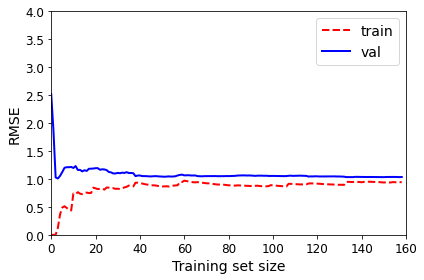

In [515]:
from sklearn.pipeline import Pipeline

m = 200
np.random.seed(42)
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m,1)

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, m - 0.2*m, 0, 4])           # not shown
save_fig("learning_curves_plot")  # not shown
plt.show()

# Regularized models

In [19]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

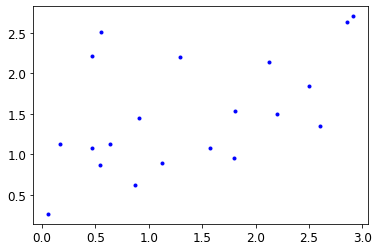

In [20]:
plt.plot(X, y, "b.");

## Ridge Regression (Tikhonov Regularization)
<div class="alert alert-success">
$$J(\theta)=\text{MSE}(\theta) + \alpha\sum_{i=1}^n\theta_i^2$$

$$\nabla_\theta J(\theta) = \nabla_\theta \text{MSE}(\theta) + \alpha \begin{bmatrix}
0\\
\theta_1 \\
\vdots \\
\theta_n 
\end{bmatrix}$$

In [21]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [22]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

Saving figure ridge_regression_plot


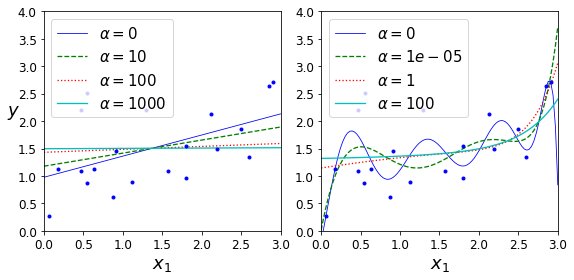

In [25]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:", "c-")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 1.3 if alpha > 0 else .8
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100, 1000), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1, 100), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

**Note**: to be future-proof, we set `max_iter=1000` and `tol=1e-3` because these will be the default values in Scikit-Learn 0.21.

In [536]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

## Lasso Regression (LASSO = Least Absolute Shrinkage and Selection Operator)
<div class="alert alert-success">
    
$$J(\theta)=\text{MSE}(\theta) + \alpha\sum_{i=1}^n|\theta_i|$$

$$\nabla_\theta J(\theta) = \nabla_\theta \text{MSE}(\theta) + \alpha \begin{bmatrix}
0\\
\text{sign}(\theta_1) \\
\vdots \\
\text{sign}(\theta_n) 
\end{bmatrix}$$

C:\Users\couzhei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8032615544821113, tolerance: 0.0009294783355207351
  model = cd_fast.enet_coordinate_descent(


Saving figure lasso_regression_plot


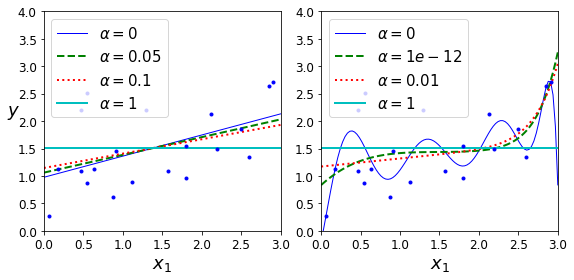

In [541]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, .05, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-12, 0.01, 1), random_state=42)

save_fig("lasso_regression_plot")
plt.show()

In [546]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

<div class="alert alert-info" id="toz">

Lasso Regression automatically performs feature selection and
outputs a sparse model (i.e., with few nonzero feature weights).
    
You can get a sense of why this is the case by looking at <a href="#out">the figure</a>: the axes represent
two model parameters, and the background contours represent different loss
functions. In the top-left plot, the contours represent the ℓ1 loss (|$\theta_1$| + |$\theta_2$|), which
drops linearly as you get closer to any axis. For example, if you initialize the model
parameters to $\theta_1 = 2$ and $\theta_2 = 0.5$, running Gradient Descent will decrement both
parameters equally (as represented by the dashed yellow line); therefore $\theta_2$ will reach
0 first (since it was closer to 0 to begin with). After that, Gradient Descent will roll
down the gutter until it reaches $\theta_1 = 0$ (with a bit of bouncing around, since the gradients
of ℓ1 never get close to 0: they are either –1 or 1 for each parameter). In the topright
plot, the contours represent Lasso’s cost function (i.e., an MSE cost function plus
an ℓ1 loss). The small white circles show the path that Gradient Descent takes to optimize
some model parameters that were initialized around $\theta_1 = 0.25$ and $\theta_2 = –1$:
notice once again how the path quickly reaches $\theta_2 = 0$, then rolls down the gutter and
ends up bouncing around the global optimum (represented by the red square). If we
increased α, the global optimum would move left along the dashed yellow line, while if we decreased α, the global optimum would move right(in this example, the optimal parameteres for the unregularized MSE are $\theta_1 = 2$ and $\theta_2 = 0.5$).

![alt text](figs/lasso_vs_ridge.png)
The two bottom plots show the same thing but with an ℓ2 penalty instead. In the
bottom-left plot, you can see that the ℓ2 loss decreases with the distance to the origin,
so Gradient Descent just takes a straight path toward that point. In the bottom-right
plot, the contours represent Ridge Regression’s cost function (i.e., an MSE cost function
plus an ℓ2 loss). There are two main differences with Lasso. First, the gradients
get smaller as the parameters approach the global optimum, so Gradient Descent naturally
slows down, which helps convergence (as there is no bouncing around). Second,
the optimal parameters (represented by the red square) get closer and closer to
the origin when you increase α, but they never get eliminated entirely.

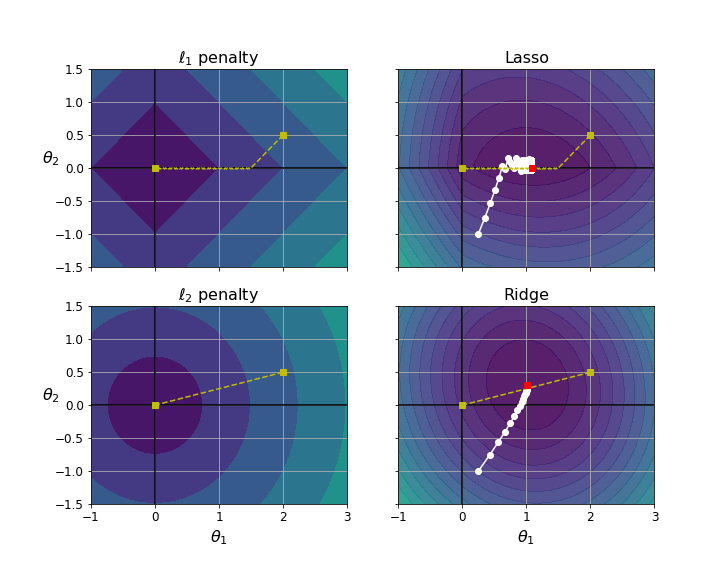

In [3]:
from IPython.display import Image, display, HTML
display(HTML("""<div id="out" class="alert alert-success">
To avoid Gradient Descent from bouncing around the optimum at the end when using Lasso, you need
to gradually reduce the learning rate during training(it will still bounce around the 
optimum, but the steps will get smaller and smaller, so it will converge).
"""))
Image(filename='figs/lasso_vs_ridge.png')

## Elastic Net

<div class="alert alert-success">
$$J(\theta)=\text{MSE}(\theta) + r\alpha\sum_{i=1}^n|\theta_i|+\frac{1-r}{2}\alpha\sum_{i=1}^n\theta_i^2$$

$r$ is called mix ratio in the book

$$\nabla_\theta J(\theta) = \nabla_\theta \text{MSE}(\theta) + r\alpha \begin{bmatrix}
0\\
\text{sign}(\theta_1) \\
\vdots \\
\text{sign}(\theta_n) 
\end{bmatrix} + 
\frac{1-r}{2}\alpha
\begin{bmatrix}
0\\
\theta_1 \\
\vdots \\
\theta_n 
\end{bmatrix}$$

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Elastic Net Regression
class ElasticRegression() :      
    def __init__( self, learning_rate, iterations, l1_penality, l2_penality ) :
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l1_penality = l1_penality
        self.l2_penality = l2_penality
        
    # Function for model training      
    def fit( self, X, Y ) :
        # no_of_training_examples, no_of_features
        self.m, self.n = X.shape
        # weight initialization
        self.W = np.zeros( self.n )
        self.b = 0
        self.X = X
        self.Y = Y
        # gradient descent learning
        for i in range( self.iterations ) :
            self.update_weights()
        return self

    # Helper function to update weights in gradient descent      
    def update_weights( self ) :
        Y_pred = self.predict( self.X )
        # calculate gradients  
        dW = np.zeros( self.n )
        for j in range( self.n ) :
            if self.W[j] > 0 :
                dW[j] = ( - ( 2 * ( self.X[:,j] ).dot( self.Y - Y_pred ) ) + \
                         self.l1_penality + 2 * self.l2_penality * self.W[j] ) / self.m
            else :
                dW[j] = ( - ( 2 * ( self.X[:,j] ).dot( self.Y - Y_pred ) ) \
                         - self.l1_penality + 2 * self.l2_penality * self.W[j] ) / self.m
  
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m         
        # update weights
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db

        return self      
    # Hypothetical function  h( x ) 
    def predict( self, X ) :
        return X.dot( self.W ) + self.b

In [26]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## Early Stopping

In [95]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], \
                                                  y[:50].ravel(), \
                                                  test_size=0.5, \
                                                  random_state=10)

In [66]:
from copy import deepcopy
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,\
                       penalty=None, learning_rate="constant", \
                       eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

In [67]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

Create the graph:

In [96]:
model = SGDRegressor(warm_start=True)

Saving figure early_stopping_plot


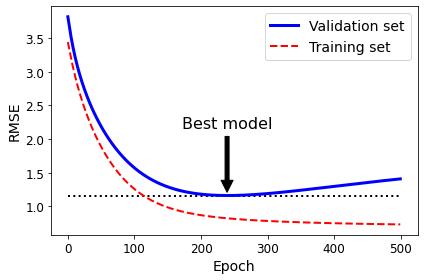

In [98]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
model = Lasso()

model = ElasticNet()

model = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,\
                     penalty=None, learning_rate="constant", \
                     eta0=0.0005, random_state=42)


n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    model.fit(X_train_poly_scaled, y_train)
    y_train_predict = model.predict(X_train_poly_scaled)
    y_val_predict = model.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

# best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()

In [86]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

<div class="alert alert-danger">

This is great! Let's make it a function, so that we can check any regression algorithm we want!

In [69]:
def comparison_learning_curve(model, X, y, n_epochs=500):
    from sklearn.metrics import mean_squared_error
    from matplotlib import pyplot as plt
    
    X_train, X_val, y_train, y_val = train_test_split(X, \
                                                  y.ravel(), \
                                                  test_size=0.2, \
                                                  random_state=10)
    
    train_errors, val_errors = [], []
    for epoch in range(n_epochs):
        model.fit(X_train, y_train)
        y_train_predict = model.predict(X_train)
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train, y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    best_epoch = np.argmin(val_errors)
    best_val_rmse = np.sqrt(val_errors[best_epoch])
    print(f"Best epoch is at:{best_epoch}")
    
    plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

    plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
    plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Epoch", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    plt.show()

In [543]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [544]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

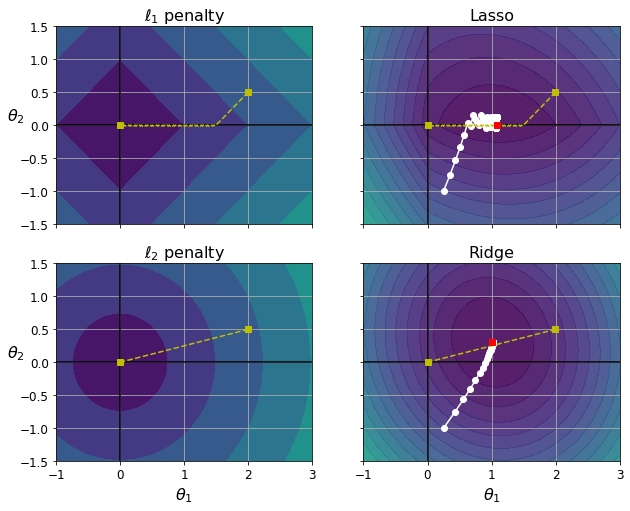

In [551]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)

# save_fig("lasso_vs_ridge_plot")
plt.savefig("figs/lasso_vs_ridge.png", format="png")
plt.show()

# Logistic regression

<div class="alert alert-success">
$$\hat{y} = \sigma(X\theta) > 0.5$$
    
Where $\sigma$ is the sigmoid function.
    
$$J(\theta)=\frac{-1}{m}[y^T\log(\sigma(X\theta)) + (1-y)^T\log(1 - \sigma(X\theta))]$$
    
$$\nabla_\theta J(\theta) = \frac{1}{m}X^T(𝜎(X\theta) - y)$$

Saving figure logistic_function_plot


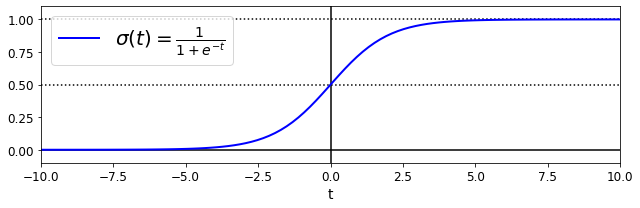

In [53]:
sigmoid = lambda x: 1/(1+np.exp(-x))
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
save_fig("logistic_function_plot")
plt.show()

In [4]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [31]:
import numpy as np

X = iris["data"][:, 3]  # petal width
y = (iris["target"] == 2).astype(np.int8)  # 1 if Iris virginica, else 0

In [33]:
# this turns a vector of shape (n,)
# to a column matrix of shape (n,1)
X = X.reshape(-1,1)

**Note**: To be future-proof we set `solver="lbfgs"` since this will be the default value in Scikit-Learn 0.22.

In [36]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

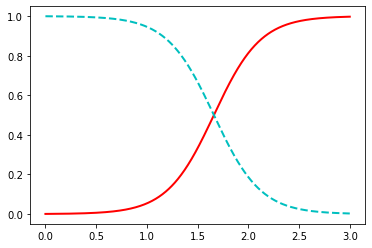

In [48]:
from matplotlib import pyplot as plt

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "r-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "c--", linewidth=2, label="Not Iris virginica");

The figure in the book actually is actually a bit fancier:

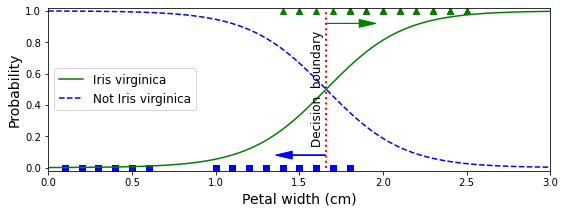

In [89]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new) # its output is a (m, 2) matrix
# first column shows the probability of belonging to the negative class
# second column shows the probability of belonging to the positive class
decision_boundary = X_new[y_proba[:, 0] <= 0.5][0][0]
decision_boundary = X_new[y_proba[:, 1] < 0.5][-1][0]
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0][0]
decision_boundary = X_new[y_proba[:, 0] > 0.5][-1][0]
# this is tricky! masking elements in a clever way

plt.figure(figsize=(9, 3))
# plotting negative classes as blue squares
plt.plot(X[y==0], y[y==0], "bs")
# plotting postive classes as green triangles
plt.plot(X[y==1], y[y==1], "g^")
# plotting the decision boundary line
plt.plot(np.array([decision_boundary, decision_boundary]), [0, 1], "r:", linewidth=2)
# plotting probabilities belonging to the positive class
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=1.5, label="Iris virginica")
# plotting probabilities belonging to the negative class
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=1.5, label="Not Iris virginica")
# putting a vertical text
plt.text(decision_boundary - 0.05, 0.15, "Decision  boundary", \
         fontsize=12, color="k", ha="center", rotation=90)
plt.arrow(decision_boundary, 0.08, -0.2, 0, head_width=0.05, \
          head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.2, 0, head_width=0.05, \
          head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=12)
plt.axis([0, 3, -0.02, 1.02])
# save_fig("logistic_regression_plot")
plt.show()

In [42]:
decision_boundary

array([1.66066066])

In [43]:
log_reg.predict([[1.7], [1.5]])

array([1, 0], dtype=int8)

In [44]:
log_reg.predict_proba([[1.7], [1.5]])

array([[0.45722097, 0.54277903],
       [0.66709636, 0.33290364]])

In [90]:
log_reg.predict_proba([[0], [3]])[:,1]

array([7.49984089e-04, 9.96995232e-01])

### Cartesian Product in `numpy`

#### 1. Using `meshgrid` and `dstack` methods:

In [ ]:
import numpy as np

A = np.linspace(1,10,4).ravel()
B = np.linspace(-3,3,3).ravel()

In [109]:
np.meshgrid(A, B)

[array([[ 1.,  4.,  7., 10.],
        [ 1.,  4.,  7., 10.],
        [ 1.,  4.,  7., 10.]]),
 array([[-3., -3., -3., -3.],
        [ 0.,  0.,  0.,  0.],
        [ 3.,  3.,  3.,  3.]])]

In [110]:
np.dstack(np.meshgrid(A, B))

array([[[ 1., -3.],
        [ 4., -3.],
        [ 7., -3.],
        [10., -3.]],

       [[ 1.,  0.],
        [ 4.,  0.],
        [ 7.,  0.],
        [10.,  0.]],

       [[ 1.,  3.],
        [ 4.,  3.],
        [ 7.,  3.],
        [10.,  3.]]])

In [111]:
np.dstack(np.meshgrid(A, B)).reshape(-1,2)

array([[ 1., -3.],
       [ 4., -3.],
       [ 7., -3.],
       [10., -3.],
       [ 1.,  0.],
       [ 4.,  0.],
       [ 7.,  0.],
       [10.,  0.],
       [ 1.,  3.],
       [ 4.,  3.],
       [ 7.,  3.],
       [10.,  3.]])

#### 2. Using `meshgrid` and `c_` and `ravel()`

In [113]:
x = np.array([1,2,3])
y = np.array([4,5])

In [114]:
x1, y1 = np.meshgrid(x, y)
np.c_[x1.ravel(), y1.ravel()]

array([[1, 4],
       [2, 4],
       [3, 4],
       [1, 5],
       [2, 5],
       [3, 5]])

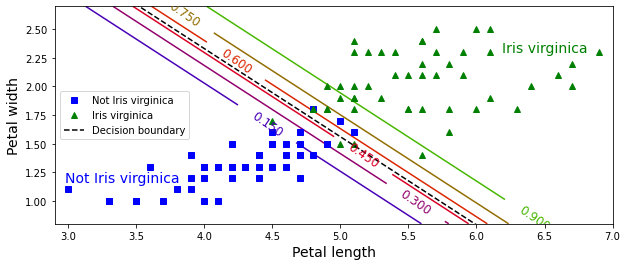

In [153]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int8)
# What is C=10**10 or "lbfgs"
log_reg = LogisticRegression(solver="lbfgs", C=10, random_state=42)
log_reg.fit(X, y)

# np.meshgrid, sounds familiar? 
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
# Cartesian product
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
# plotting points of different classes
# another clever way to pointing to them!
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "g^", label="Iris virginica")

zz = y_proba[:, 1].reshape(x0.shape)
# plotting 6 contours, brilliant!
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg, levels=6)


left_right = np.array([2.9, 7])
# ??
boundary = -(log_reg.coef_[0][0] * left_right + \
             log_reg.intercept_[0]) / log_reg.coef_[0][1]

# labeling contours
plt.clabel(contour, inline=1, fontsize=12)

# plotting dashed black decision boundary line
plt.plot(left_right, boundary, "k--", linewidth=1.5, label="Decision boundary")
# putting texts
plt.text(3.4, 1.16, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
# putting labels
plt.legend(loc="center left")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
# limit axes
plt.axis([2.9, 7, 0.8, 2.7])
# save_fig("logistic_regression_contour_plot")
plt.show()

<div class="alert alert-info">
Just like other linear models, Logistic Regression models can be regularized using $ℓ_1$ or $ℓ_2$ penalties. Scikit-Learn actually adds an $ℓ_2$ penalty by default.
    
The hyperparameter controlling the regularization strength of a Scikit-Learn `LogisticRegression` model is not `alpha` (as in linear models), but its inverse: `C`. The higher the value of C, the less regularization the model have.

# Softmax Regression

<div class="alert alert-success">
Softmax score for class $k$:<br>
$$s_k(x) = {\theta^{(k)}}^Tx$$<br>
Each class has its own dedicated parameter vector $\theta^{(k)}$. Thus the vectorized format would be as follows:
<br><br>
$$s(X) = \begin{bmatrix}s_1(X) & \cdots & s_k(X)\end{bmatrix} = \begin{bmatrix}\cdots {x^{(1)}}^T \cdots\\
\vdots  \\
\cdots {x^{(m)}}^T \cdots
\end{bmatrix}_{(m,n)}
\begin{bmatrix}\vdots & & \vdots\\
\theta^{(1)} & \cdots & \theta^{(k)}\\
\vdots & & \vdots
\end{bmatrix}_{(n,k)}
=X\Theta$$<br>
Softmax function for class $k$:
$$\hat{p}_k = \frac{\exp(s_k(x))}{\sum_{j=1}^K\exp(s_j(x))}$$
    
Vectorizing this one:
$$\hat{P} = \begin{bmatrix}\hat{p_1} & \cdots & \hat{p_k}\end{bmatrix}=\sigma(s(X)) = \sigma([X\theta^{(1)} \cdots X\theta^{(k)}])= \begin{bmatrix}\frac{\exp(X\theta^{(1)})}{\sum_1^k\exp(X\theta^{(i)})} & \cdots & \frac{\exp(X\theta^{(k)})}{\sum_1^k\exp(X\theta^{(i)})}\end{bmatrix}$$

Cross entropy cost function be like:
$$J = \frac{-1}{m}\mathbf{Y}\mathbf{*}\log(\mathbf{\hat{P}})$$
    
    
<div class="alert alert-warning">
Not sure!   
$$\nabla_\Theta J(\Theta) = (1/m)\mathbf{X}^T(\mathbf{\hat{P}} - \mathbf{Y})$$

In [5]:
from sklearn.linear_model import LogisticRegression

from sklearn import datasets
iris = datasets.load_iris()

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

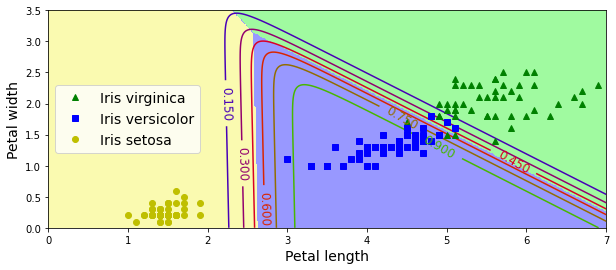

In [6]:
import numpy as np
from matplotlib import pyplot as plt

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, levels=6)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
# save_fig("softmax_regression_contour_plot")
plt.show()

In [7]:
softmax_reg.predict([[5, 2]])

array([2])

In [8]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

# Extra Materials

<input type="checkbox"/> [Linear Regression by Coursera](../ai-journey/coursera-ml/Exercise1/exercise1.ipynb)</input><br>
<input type="checkbox"/> [Logistic Regression by Coursera](../ai-journey/coursera-ml/Exercise2/exercise2.ipynb)</input><br>
<input type="checkbox"/> [Polynomial Regression and Regularized Linear Regressions by Coursera](../ai-journey/coursera-ml/Exercise5/exercise5.ipynb)</input>

# Exercise solutions

## 1. to 11.

See appendix A.

## 12. Batch Gradient Descent with early stopping for Softmax Regression
(without using Scikit-Learn)

Let's start by loading the data. We will just reuse the Iris dataset we loaded earlier.

In [67]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

We need to add the bias term for every instance ($x_0 = 1$):

In [68]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]

And let's set the random seed so the output of this exercise solution is reproducible:

In [69]:
np.random.seed(2042)

The easiest option to split the dataset into a training set, a validation set and a test set would be to use Scikit-Learn's `train_test_split()` function, but the point of this exercise is to try understand the algorithms by implementing them manually. So here is one possible implementation:

In [70]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

The targets are currently class indices (0, 1 or 2), but we need target class probabilities to train the Softmax Regression model. Each instance will have target class probabilities equal to 0.0 for all classes except for the target class which will have a probability of 1.0 (in other words, the vector of class probabilities for ay given instance is a one-hot vector). Let's write a small function to convert the vector of class indices into a matrix containing a one-hot vector for each instance:

In [71]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

Let's test this function on the first 10 instances:

In [72]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [73]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

Looks good, so let's create the target class probabilities matrix for the training set and the test set:

In [74]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

Now let's implement the Softmax function. Recall that it is defined by the following equation:

$\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$

In [75]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

We are almost ready to start training. Let's define the number of inputs and outputs:

In [76]:
n_inputs = X_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))   # == 3 (3 iris classes)

Now here comes the hardest part: training! Theoretically, it's simple: it's just a matter of translating the math equations into Python code. But in practice, it can be quite tricky: in particular, it's easy to mix up the order of the terms, or the indices. You can even end up with code that looks like it's working but is actually not computing exactly the right thing. When unsure, you should write down the shape of each term in the equation and make sure the corresponding terms in your code match closely. It can also help to evaluate each term independently and print them out. The good news it that you won't have to do this everyday, since all this is well implemented by Scikit-Learn, but it will help you understand what's going on under the hood.

So the equations we will need are the cost function:

$J(\mathbf{\Theta}) =
- \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

And the equation for the gradients:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

Note that $\log\left(\hat{p}_k^{(i)}\right)$ may not be computable if $\hat{p}_k^{(i)} = 0$. So we will add a tiny value $\epsilon$ to $\log\left(\hat{p}_k^{(i)}\right)$ to avoid getting `nan` values.

In [77]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 5.446205811872683
500 0.8350062641405651
1000 0.6878801447192402
1500 0.6012379137693314
2000 0.5444496861981872
2500 0.5038530181431525
3000 0.47292289721922487
3500 0.44824244188957774
4000 0.4278651093928793
4500 0.41060071429187134
5000 0.3956780375390374


And that's it! The Softmax model is trained. Let's look at the model parameters:

In [78]:
Theta

array([[ 3.32094157, -0.6501102 , -2.99979416],
       [-1.1718465 ,  0.11706172,  0.10507543],
       [-0.70224261, -0.09527802,  1.4786383 ]])

Let's make predictions for the validation set and check the accuracy score:

In [79]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

Well, this model looks pretty good. For the sake of the exercise, let's add a bit of $\ell_2$ regularization. The following training code is similar to the one above, but the loss now has an additional $\ell_2$ penalty, and the gradients have the proper additional term (note that we don't regularize the first element of `Theta` since this corresponds to the bias term). Also, let's try increasing the learning rate `eta`.

In [80]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
        loss = xentropy_loss + alpha * l2_loss
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 6.629842469083912
500 0.5339667976629505
1000 0.5036400750148942
1500 0.49468910594603216
2000 0.4912968418075476
2500 0.48989924700933296
3000 0.4892990598451198
3500 0.4890351244397859
4000 0.4889173621830818
4500 0.4888643337449303
5000 0.4888403120738818


Because of the additional $\ell_2$ penalty, the loss seems greater than earlier, but perhaps this model will perform better? Let's find out:

In [81]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

Cool, perfect accuracy! We probably just got lucky with this validation set, but still, it's pleasant.

Now let's add early stopping. For this we just need to measure the loss on the validation set at every iteration and stop when the error starts growing.

In [82]:
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 4.7096017363419875
500 0.5739711987633519
1000 0.5435638529109128
1500 0.5355752782580262
2000 0.5331959249285545
2500 0.5325946767399382
2765 0.5325460966791898
2766 0.5325460971327978 early stopping!


In [83]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

Still perfect, but faster.

Now let's plot the model's predictions on the whole dataset:

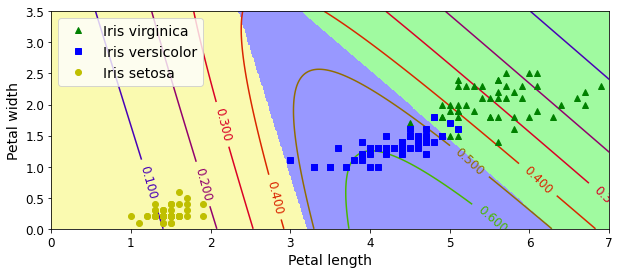

In [84]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

And now let's measure the final model's accuracy on the test set:

In [85]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333

Our perfect model turns out to have slight imperfections. This variability is likely due to the very small size of the dataset: depending on how you sample the training set, validation set and the test set, you can get quite different results. Try changing the random seed and running the code again a few times, you will see that the results will vary.